In [1]:
import torch
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid") # agrega un nuevo tema, para los graficos por defecto

In [2]:
df = pd.read_csv('dataset/limpio.csv')

In [3]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,grupo 0,grupo 1
0,15.0,8,350.0,165.0,3693.0,11.5,1,1,0
1,18.0,8,318.0,150.0,3436.0,11.0,1,1,0
2,16.0,8,304.0,150.0,3433.0,12.0,1,1,0
3,17.0,8,302.0,140.0,3449.0,10.5,1,1,0
4,15.0,8,429.0,198.0,4341.0,10.0,1,1,0
...,...,...,...,...,...,...,...,...,...
386,27.0,4,140.0,86.0,2790.0,15.6,1,0,0
387,44.0,4,97.0,52.0,2130.0,24.6,2,0,0
388,32.0,4,135.0,84.0,2295.0,11.6,1,0,0
389,28.0,4,120.0,79.0,2625.0,18.6,1,0,0


In [4]:
X = pd.concat([df.iloc[:, :6], df.iloc[:, 7:]], axis=1)
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,grupo 0,grupo 1
0,15.0,8,350.0,165.0,3693.0,11.5,1,0
1,18.0,8,318.0,150.0,3436.0,11.0,1,0
2,16.0,8,304.0,150.0,3433.0,12.0,1,0
3,17.0,8,302.0,140.0,3449.0,10.5,1,0
4,15.0,8,429.0,198.0,4341.0,10.0,1,0
...,...,...,...,...,...,...,...,...
386,27.0,4,140.0,86.0,2790.0,15.6,0,0
387,44.0,4,97.0,52.0,2130.0,24.6,0,0
388,32.0,4,135.0,84.0,2295.0,11.6,0,0
389,28.0,4,120.0,79.0,2625.0,18.6,0,0


In [5]:
y = df['origin']
y

0      1
1      1
2      1
3      1
4      1
      ..
386    1
387    2
388    1
389    1
390    1
Name: origin, Length: 391, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state= 1)
print('X_train: ', type('X_train'))
X_train.head(5)

X_train:  <class 'str'>


,mpg,cylinders,displacement,horsepower,weight,acceleration,grupo 0,grupo 1
341,32.3,4,97.0,67.0,2065.0,17.8,0,0
277,21.5,6,231.0,115.0,3245.0,15.4,0,1
387,44.0,4,97.0,52.0,2130.0,24.6,0,0
11,15.0,8,400.0,150.0,3761.0,9.5,1,0
170,24.0,4,119.0,97.0,2545.0,17.0,1,0


In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_stad = sc.fit_transform(X_train.iloc[:, :6]) 
X_test_stad = sc.transform(X_test.iloc[:, :6]) 
print('X_train_stad: ', type('X_train_stad'))

X_train_stad = np.concatenate([X_train_stad, X_train.iloc[:, 7:].values], axis=1)
X_test_stad = np.concatenate([X_test_stad, X_test.iloc[:, 7:].values], axis=1)



X_train_stad:  <class 'str'>


In [8]:
X_train_stad.shape

(312, 7)

In [9]:
# no se porque tuve que hacer esto
y_test = np.array(y_test)

In [10]:
X_train_stad = torch.as_tensor(X_train_stad, dtype=torch.float32)
X_test_stad = torch.as_tensor(X_test_stad, dtype=torch.float32)
y_train = torch.as_tensor(y_train, dtype=torch.int64)
y_test = torch.as_tensor(y_test, dtype=torch.int64)

In [11]:
X_train_stad.shape

torch.Size([312, 7])

In [12]:
y_train.shape

torch.Size([312])

In [13]:
y_train = y_train -1  # deben iniciar desde 0
y_train

y_test = y_test -1 # deben iniciar desde 0
y_test

tensor([1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
        1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2,
        2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 1, 0, 0, 0])

In [14]:
from torch.utils.data import TensorDataset

train = TensorDataset(X_train_stad, y_train)

In [15]:
from torch.utils.data import DataLoader

batch_size = 6
torch.manual_seed =1

train_dl = DataLoader(train, batch_size, shuffle=True)

In [16]:
import torch.nn as nn

model = nn.Sequential(nn.Linear(7,7), nn.ReLU(),
                      nn.Linear(7,3), nn.Softmax(dim=1))
model

Sequential(
  (0): Linear(in_features=7, out_features=7, bias=True)
  (1): ReLU()
  (2): Linear(in_features=7, out_features=3, bias=True)
  (3): Softmax(dim=1)
)

In [17]:
loss_fn  = nn.CrossEntropyLoss() # las etiquetas deben comenzar desde cero hasta n-1 etiquetas
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum= 0.7)

In [18]:
# si se inicializa los pesos con valores aleatorios, eso fectara los resultados asi se designe una semilla

#def initialize_weights(layer):
#    if isinstance(layer, nn.Linear):
#        nn.init.xavier_uniform_(layer.weight)

"""
def l1_penalty(model, l1_weight):
    l1_reg = 0
    for name, param in model.named_parameters():
        if 'weight' in name:
            l1_reg += torch.norm(param, 1)
    return l1_weight * l1_reg

"""

"\ndef l1_penalty(model, l1_weight):\n    l1_reg = 0\n    for name, param in model.named_parameters():\n        if 'weight' in name:\n            l1_reg += torch.norm(param, 1)\n    return l1_weight * l1_reg\n\n"

In [19]:
# Aplicar inicialización Xavier a todas las capas
#model.apply(initialize_weights)

# Calcular la penalización L1 para todos los pesos de las capas
#l1_weight = 0.01
#l1_loss = l1_penalty(model, l1_weight)


In [20]:
asdasd

NameError: name 'asdasd' is not defined

In [ ]:
#Algoritmo 1

num_epochs = 200

def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs

    accuracy_hist_train = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs

    for epoch in range(num_epochs):
        for x_batch, y_batch in train_dl:

            # fordward pass
            pred = model(x_batch)
            # calcular perdida
            loss = loss_fn(pred, y_batch)
            # retropropagacion 
            loss.backward()
            # actualizacion de pesos a traves del gradiente
            optimizer.step()
            # reinicializar los pesos
            optimizer.zero_grad()

            # error en el train
            loss_hist_train[epoch] += loss.item()

            # exactitud en el train
            _, predicted = torch.max(pred, 1)
            is_correct = (predicted == y_batch)
            accuracy_hist_train[epoch] += is_correct.float().mean()

        # se halla el promedio
        loss_hist_train[epoch] /= len(train_dl)
        accuracy_hist_train[epoch] /= len(train_dl)
       
        pred = model(x_valid)
        loss= loss_fn(pred, y_valid)

        # error en el test
        loss_hist_valid[epoch] += loss.item()

        # exactitud en el test 
        _, predicted = torch.max(pred, 1)
        is_correct = (predicted == y_valid).float()
        accuracy_hist_valid[epoch] += is_correct.float().mean()


    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

history = train(model, num_epochs, train_dl, X_test_stad, y_test)

Text(0.5, 0, 'Epocas')

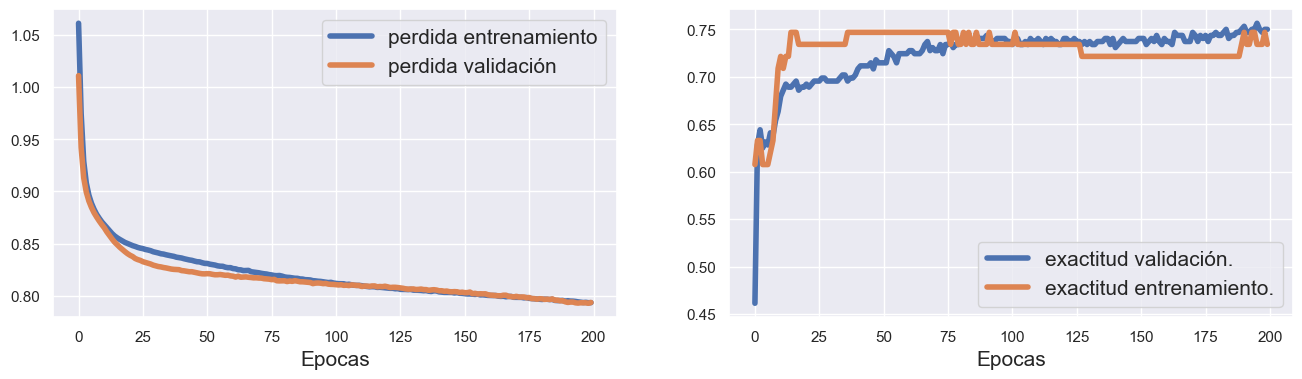

In [ ]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
plt.plot(history[0], lw=4)
plt.plot(history[1], lw=4)
plt.legend(['perdida entrenamiento', 'perdida validación'], fontsize=15)
ax.set_xlabel('Epocas', size=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(history[2], lw=4)
plt.plot(history[3], lw=4)
plt.legend(['exactitud validación.', 'exactitud entrenamiento.'], fontsize=15)
ax.set_xlabel('Epocas', size=15)

In [ ]:
asdsad

In [21]:
test = TensorDataset(X_test_stad, y_test)

test_dl = DataLoader(train)

In [22]:
#Algoritmo 2

# Entrenamiento durante 2 épocas
num_epochs = 200
loss_hist = []
accuracy_hist = []
test_loss_hist = []
test_accuracy_hist = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    # Entrenamiento
    model.train()  # Configurar el modelo en modo de entrenamiento
    for inputs, labels in train_dl:

        # fordward pass
        pred = model(inputs)
        # calcular perdida
        loss = loss_fn(pred, labels)
        # retropropagacion 
        loss.backward()
        # actualizacion de pesos a traves del gradiente
        optimizer.step()
        # reinicializar los pesos
        optimizer.zero_grad()

        # error en el train
        running_loss += loss.item()

        # exactitud en el train
        _, predicted = torch.max(pred, 1)
        correct_predictions += (predicted == labels).sum().item()

                
        
    # se halla el promedio
    epoch_loss = running_loss / len(train_dl)
    loss_hist.append(epoch_loss)

    # se halla el promedio
    epoch_accuracy = correct_predictions / len(test_dl)
    accuracy_hist.append(epoch_accuracy)
    
    # Evaluación en datos de prueba
    model.eval()  # Configurar el modelo en modo de evaluación
    
    test_running_loss = 0.0
    test_correct_predictions = 0
    test_total_predictions = 0

    with torch.no_grad():  # Desactivar el cálculo de gradientes durante la evaluación
        for inputs, labels in test_dl:  # Suponiendo que tienes un DataLoader llamado test_dl
            
            # fordward pass
            pred = model(inputs)
            # calcular perdida
            test_loss = loss_fn(pred, labels)

            # exactitud en el test
            _, test_predicted = torch.max(pred, 1)
            test_correct_predictions += (test_predicted == labels).sum().item()

            # error en el test
            test_running_loss += test_loss.item()

    # se halla el promedio
    test_epoch_accuracy = test_correct_predictions / len(test_dl)
    test_loss_hist.append(test_epoch_loss)
    
    # se halla el promedio
    test_epoch_loss = test_running_loss / len(test_dl)
    test_accuracy_hist.append(test_epoch_accuracy)
    
    #print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss}, Train Accuracy: {epoch_accuracy},
    #       Test Loss: {test_epoch_loss}, Test Accuracy: {test_epoch_accuracy}")   


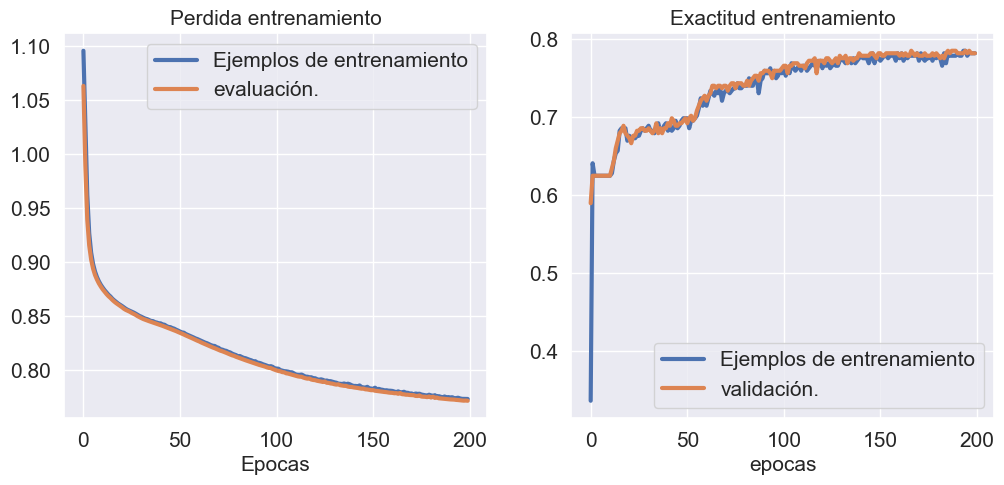

In [23]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.plot(test_loss_hist, lw=3)
plt.legend(['Ejemplos de entrenamiento', 'evaluación.'], fontsize=15)
ax.set_title('Perdida entrenamiento', size=15)
ax.set_xlabel('Epocas', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.plot(test_accuracy_hist, lw=3)
plt.legend(['Ejemplos de entrenamiento', 'validación.'], fontsize=15)
ax.set_title('Exactitud entrenamiento', size=15)
ax.set_xlabel('epocas', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.show()


Los dos algoritmos tienen el mismo propósito: entrenar un modelo y registrar la pérdida y la exactitud a lo largo de las épocas tanto en los datos de entrenamiento como en los de validación. Sin embargo, hay algunas diferencias en la implementación que podrían llevar a resultados ligeramente diferentes:

1-Cálculo de pérdida y exactitud: En el primer algoritmo, la pérdida y la exactitud se calculan dentro del bucle de entrenamiento y luego se promedian sobre todas las muestras del conjunto de entrenamiento (train_dl). En el segundo algoritmo, la pérdida y la exactitud se calculan tanto para el conjunto de entrenamiento como para el de validación en cada época por separado.

2-Modo de entrenamiento y evaluación: El segundo algoritmo utiliza model.train() y model.eval() para alternar entre el modo de entrenamiento y el de evaluación, mientras que el primer algoritmo no lo hace. Esto afecta a capas como Dropout y BatchNorm, que se comportan de manera diferente en cada modo.

3-Optimización de GPU: Si estás utilizando GPU para entrenar tu modelo, ten en cuenta que los cálculos en la GPU pueden no ser completamente deterministas, lo que podría resultar en resultados ligeramente diferentes entre ejecuciones.

4-Inicialización de pesos aleatorios: Si tu modelo utiliza inicialización de pesos aleatorios y no se inicializan explícitamente con una semilla fija, los pesos se inicializarán de manera diferente en cada ejecución.

Para asegurar una mayor consistencia entre los resultados de los dos algoritmos, asegúrate de que:

- Utilizas la misma semilla aleatoria para inicializar el generador de números aleatorios al principio de tu código.

- Consideras el efecto de las capas de Dropout y BatchNorm al cambiar entre el modo de entrenamiento y el de evaluación.

- Inicializas explícitamente los pesos de tu modelo con una semilla fija si es necesario.

- Tienes en cuenta el posible efecto de la optimización de GPU en la reproducibilidad de los resultados.

- Al tomar estas consideraciones, deberías ser capaz de obtener resultados más consistentes entre los dos algoritmos.

Ambas metodologías tienen sus ventajas y desventajas, y la elección entre una u otra depende del contexto específico y los requisitos del problema en cuestión. Aquí hay algunas consideraciones:

**Metodología del Algoritmo 1:**

*Ventajas:*

-Calcula la pérdida y la exactitud de manera acumulativa a lo largo de cada época, lo que puede ser útil para monitorear el progreso del entrenamiento.

-Utiliza promedios sobre el conjunto de entrenamiento, lo que puede ser más estable si las muestras de entrenamiento varían en tamaño o dificultad.

*Desventajas:*

-No considera explícitamente los datos de validación durante el entrenamiento, lo que puede llevar a una optimización subóptima del modelo.

-No cambia entre los modos de entrenamiento y evaluación, lo que puede llevar a resultados sesgados si el modelo incluye capas como Dropout o BatchNorm.

**Metodología del Algoritmo 2:**

Ventajas:**

-Calcula la pérdida y la exactitud tanto para el conjunto de entrenamiento como para el de validación en cada época, lo que proporciona una evaluación más completa del rendimiento del modelo.

-Cambia entre los modos de entrenamiento y evaluación, lo que asegura que el modelo se esté evaluando de manera adecuada durante la validación.

*Desventajas:*

-Puede ser más propenso a sobreajuste si el conjunto de entrenamiento y el de validación son muy diferentes, ya que el modelo se adapta directamente a los datos de validación durante el entrenamiento.

-Puede ser menos eficiente computacionalmente debido a la necesidad de evaluar el modelo en el conjunto de validación en cada época.

En resumen, si la estabilidad y la simplicidad son prioritarias y no hay preocupaciones significativas sobre el sobreajuste, la metodología del Algoritmo 1 podría ser preferible. Sin embargo, si se necesita una evaluación más completa del rendimiento del modelo y se desea evitar el sobreajuste, la metodología del Algoritmo 2 podría ser más adecuada. Es importante considerar las necesidades específicas del problema y las limitaciones computacionales al tomar una decisión.